In [8]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
#load dataset

ds=pd.read_csv("mall_Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Taking input value for x

x =ds[["Annual Income (k$)","Spending Score (1-100)"]]


In [11]:
#Importing model selection libraries (kmeans) and fitting for prediction of cluster

from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters =5, init ='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(x)


In [12]:

y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [15]:
# Making clusters table

result= pd.DataFrame(data=y_kmeans,columns=['Cluster'])
result

,Cluster
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


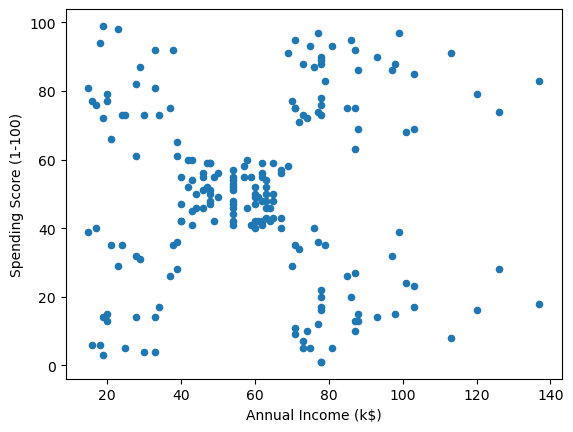

In [13]:
# ploting variables
x.plot(kind='scatter', x="Annual Income (k$)",y="Spending Score (1-100)")
plt.show()

In [18]:
# For myinpyt
kmeans.predict([[10,40]])

array([4])

In [19]:
# join x data and cluster type data

data= pd.concat([x,result],axis=1)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

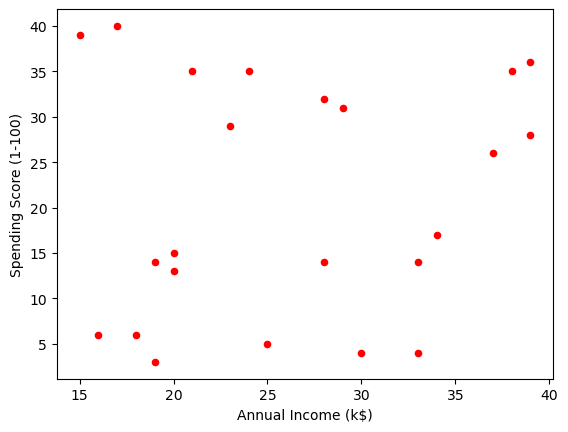

In [21]:
# Getting specific cluster List visualization

data [data['Cluster']==4].plot(kind ='scatter',x="Annual Income (k$)",y="Spending Score (1-100)",color='Red')


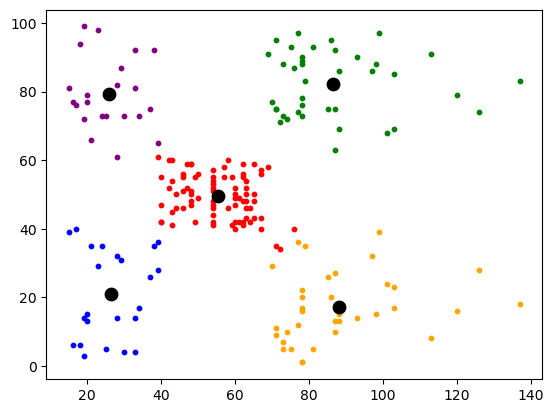

In [27]:
# Clusterwise Visualization

colors =['red','green','purple','orange','blue']
for i in range(0,5):
    cluster =data[data['Cluster'] ==i]
    plt.scatter(cluster["Annual Income (k$)"], cluster["Spending Score (1-100)"], color =colors[i],s=10)
    plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],color ='black', s=80)

In [31]:
# user input 

print("Enter new cluster data  to predict cluster ")

income =float(input("Enter Annual Income (k$) :"))
score =float(input("Enter Spendening score :"))


predicted_cluster =kmeans.predict([[income,score]])[0]
print(f"The Cluster belongs to cluster :{predicted_cluster}")

Enter new cluster data  to predict cluster 


Enter Annual Income (k$) : 3
Enter Spendening score : 56


The Cluster belongs to cluster :2
